In [0]:
from fastai.vision import *

In [0]:
np.random.seed(3)

In [7]:
!pip install kaggle

In [0]:
!mkdir kaggle

In [0]:
import os
import json 
api_token = {"username":"Your_UserName","key":"Your_GitHub_API_key_a_very_long_string"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

In [0]:
!chmod 600 /content/kaggle/kaggle.json

In [29]:
!mkdir root/.kaggle

mkdir: cannot create directory ‘root/.kaggle’: No such file or directory


In [0]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!mkdir derm

In [39]:
!kaggle datasets download kmader/skin-cancer-mnist-ham10000  -p content/derm/

100% 2.61G/2.62G [00:21<00:00, 162MB/s]
100% 2.62G/2.62G [00:21<00:00, 133MB/s]


In [41]:
!unzip content/derm/skin-cancer-mnist-ham10000.zip

Archive:  content/derm/skin-cancer-mnist-ham10000.zip
  inflating: hmnist_28_28_RGB.csv    
  inflating: HAM10000_metadata.csv   
  inflating: HAM10000_images_part_1.zip  
  inflating: hmnist_28_28_L.csv      
  inflating: hmnist_8_8_L.csv        
  inflating: HAM10000_images_part_2.zip  
  inflating: hmnist_8_8_RGB.csv      


In [0]:
from glob import glob

In [50]:
print(os.listdir("content"))

['derm']


In [53]:
!unzip HAM10000_images_part_1.zip

Archive:  HAM10000_images_part_1.zip
  inflating: ISIC_0024306.jpg        
  inflating: ISIC_0024307.jpg        
  inflating: ISIC_0024308.jpg        
  inflating: ISIC_0024309.jpg        
  inflating: ISIC_0024310.jpg        
  inflating: ISIC_0024311.jpg        
  inflating: ISIC_0024312.jpg        
  inflating: ISIC_0024313.jpg        
  inflating: ISIC_0024314.jpg        
  inflating: ISIC_0024315.jpg        
  inflating: ISIC_0024316.jpg        
  inflating: ISIC_0024317.jpg        
  inflating: ISIC_0024318.jpg        
  inflating: ISIC_0024319.jpg        
  inflating: ISIC_0024320.jpg        
  inflating: ISIC_0024321.jpg        
  inflating: ISIC_0024322.jpg        
  inflating: ISIC_0024323.jpg        
  inflating: ISIC_0024324.jpg        
  inflating: ISIC_0024325.jpg        
  inflating: ISIC_0024326.jpg        
  inflating: ISIC_0024327.jpg        
  inflating: ISIC_0024328.jpg        
  inflating: ISIC_0024329.jpg        
  inflating: ISIC_0024330.jpg        
  inflating: 

In [54]:
!unzip HAM10000_images_part_2.zip

Archive:  HAM10000_images_part_2.zip
  inflating: ISIC_0029306.jpg        
  inflating: ISIC_0029307.jpg        
  inflating: ISIC_0029308.jpg        
  inflating: ISIC_0029309.jpg        
  inflating: ISIC_0029310.jpg        
  inflating: ISIC_0029311.jpg        
  inflating: ISIC_0029312.jpg        
  inflating: ISIC_0029313.jpg        
  inflating: ISIC_0029314.jpg        
  inflating: ISIC_0029315.jpg        
  inflating: ISIC_0029316.jpg        
  inflating: ISIC_0029317.jpg        
  inflating: ISIC_0029318.jpg        
  inflating: ISIC_0029319.jpg        
  inflating: ISIC_0029320.jpg        
  inflating: ISIC_0029321.jpg        
  inflating: ISIC_0029322.jpg        
  inflating: ISIC_0029323.jpg        
  inflating: ISIC_0029324.jpg        
  inflating: ISIC_0029325.jpg        
  inflating: ISIC_0029326.jpg        
  inflating: ISIC_0029327.jpg        
  inflating: ISIC_0029328.jpg        
  inflating: ISIC_0029329.jpg        
  inflating: ISIC_0029330.jpg        
  inflating: 

In [67]:
path = Path("")
labels = pd.read_csv('HAM10000_metadata.csv', sep=',')
labels.head()

#imageid = {os.path.splitext(os.path.basename(x))[0]: x
                     #for x in glob(os.path.join(path, '*', '*.jpg'))}

labels['path'] = labels['image_id'] +".jpg"
#labels['path'] = labels['path'].str[9:]
labels.sample(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
289,HAM_0006128,ISIC_0028701,bkl,histo,55.0,female,lower extremity,ISIC_0028701.jpg
2714,HAM_0000953,ISIC_0026213,bcc,histo,70.0,male,chest,ISIC_0026213.jpg
4879,HAM_0003863,ISIC_0027879,nv,follow_up,40.0,female,lower extremity,ISIC_0027879.jpg
5831,HAM_0001092,ISIC_0031962,nv,follow_up,50.0,male,lower extremity,ISIC_0031962.jpg
9788,HAM_0000490,ISIC_0027303,akiec,histo,85.0,male,lower extremity,ISIC_0027303.jpg


In [0]:
path = ""

In [0]:
#bs = 32

In [0]:
tfms=get_transforms(do_flip=True, flip_vert=True)

In [0]:
data = ImageDataBunch.from_df(path='', df=labels,
                              ds_tfms=tfms, size=112,bs=16,
                               valid_pct=0.2, fn_col='path', 
                              label_col='dx'
                              ).normalize(imagenet_stats)

In [73]:
data.label_list

LabelLists;

Train: LabelList (8012 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
bkl,bkl,bkl,bkl,bkl
Path: .;

Valid: LabelList (2003 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
bcc,bkl,bkl,nv,nv
Path: .;

Test: None

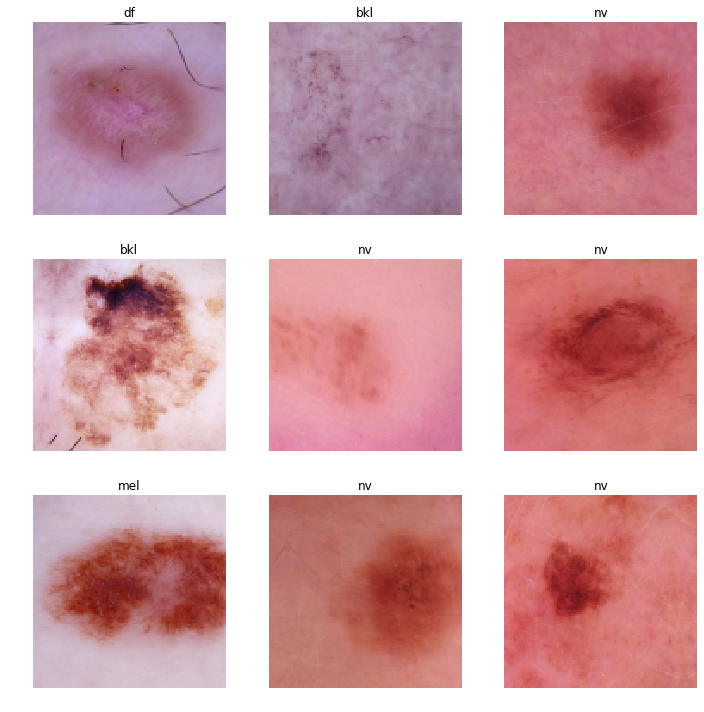

In [74]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
arch = models.densenet121

In [76]:
learn = cnn_learner(data, arch, metrics= accuracy, callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:01<00:00, 26455509.64it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


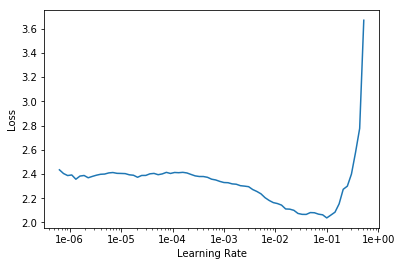

In [77]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.781577,0.664079,0.761857,02:49
1,0.786888,0.651289,0.767349,02:45
2,0.716416,0.706358,0.759860,02:43
3,0.767779,0.643742,0.773340,02:42
4,0.655443,0.564692,0.798802,02:41
5,0.640304,0.591397,0.802796,02:42
6,0.611710,0.553297,0.806291,02:41
7,0.528529,0.529070,0.826261,02:43
8,0.504274,1.035191,0.821767,02:40
9,0.502356,0.865642,0.823764,02:42


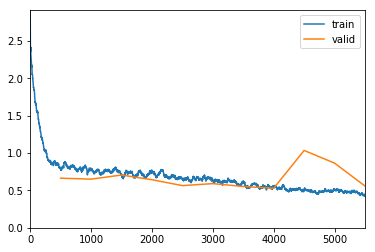

In [78]:
learn.fit_one_cycle(11,slice(1e-02))

In [0]:
learn.save("Derm_stage1")

In [80]:
#Accuracy based on validation set
preds, y , loss = learn.get_preds(ds_type=DatasetType.Valid,with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} % .'.format(acc*100))

The accuracy is 83.27508544921875 % .


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


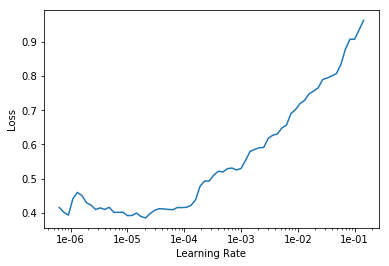

In [82]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.509853,0.922749,0.824763,02:50
1,0.468021,0.681992,0.827259,02:46
2,0.465633,0.697822,0.834748,02:50
3,0.456371,0.751976,0.830754,02:47
4,0.409420,0.689524,0.839241,02:49


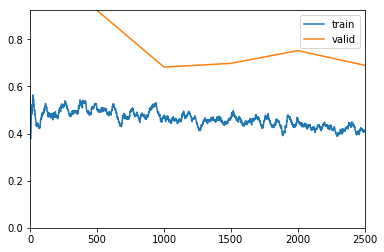

In [83]:
learn.fit_one_cycle(5, slice(5e-6,5e-4), pct_start=0.05)

In [0]:
learn.save("Derm_stage2")

In [0]:
data = ImageDataBunch.from_df(path='', df=labels,
                              ds_tfms=tfms, size=224,bs=16,
                               valid_pct=0.2, fn_col='path', 
                              label_col='dx'
                              ).normalize(imagenet_stats)

In [0]:
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


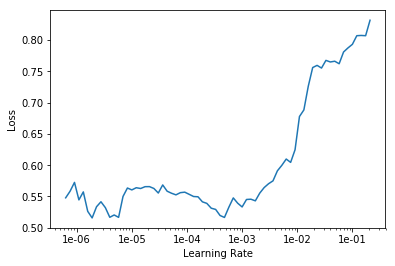

In [87]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.525852,0.770191,0.843235,04:38
1,0.475554,0.507658,0.854718,04:33
2,0.476933,0.451032,0.861707,04:36
3,0.431063,0.442129,0.866201,04:36


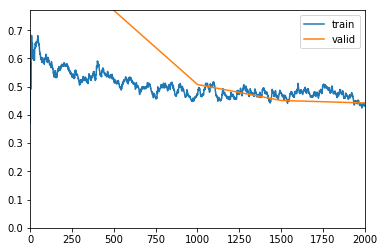

In [88]:
learn.fit_one_cycle(4,slice(1e-04))

In [0]:
learn.save("Derm_stage3")

In [0]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


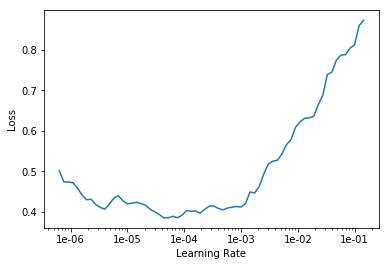

In [91]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.434155,0.428030,0.863205,04:36
1,0.440730,0.449613,0.878682,04:38
2,0.375327,0.398186,0.875686,04:34
3,0.387351,0.472509,0.878682,04:33
4,0.403283,0.402570,0.876186,04:38


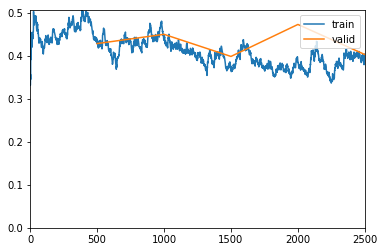

In [92]:
learn.fit_one_cycle(5, slice(1e-5,1e-4), pct_start=0.05)

In [0]:
learn.save("Derm_stage4")

In [93]:
#Accuracy based on validation set
preds, y , loss = learn.get_preds(ds_type=DatasetType.Valid,with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} % .'.format(acc*100))

The accuracy is 87.61856842041016 % .


In [0]:
interp = ClassificationInterpretation.from_learner(learn)
#losses, idxs = interp.top_losses()
#len(data.valid_ds)==len(losses)==len(idxs)

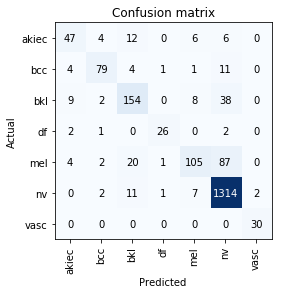

In [95]:
interp.plot_confusion_matrix()

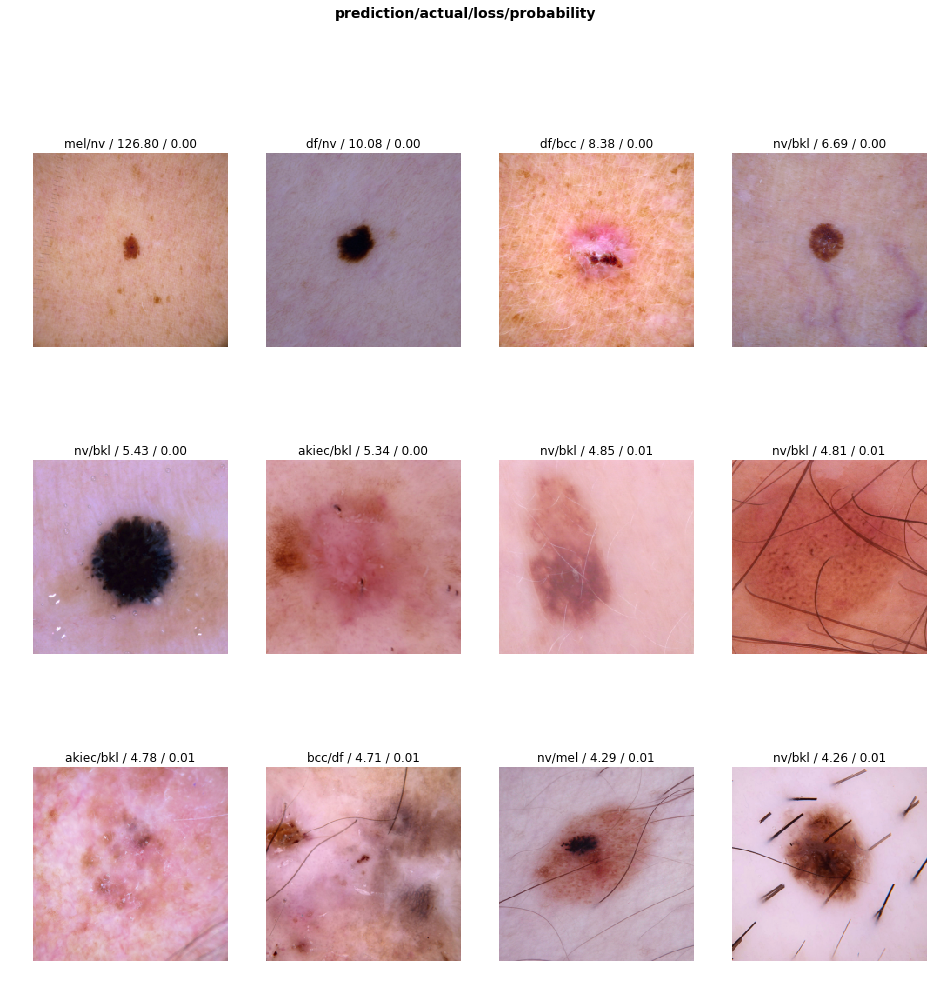

In [105]:
interp.plot_top_losses(12, figsize=(16,16), heatmap = False)

In [97]:

interp.most_confused()

[('mel', 'nv', 87),
 ('bkl', 'nv', 38),
 ('mel', 'bkl', 20),
 ('akiec', 'bkl', 12),
 ('bcc', 'nv', 11),
 ('nv', 'bkl', 11),
 ('bkl', 'akiec', 9),
 ('bkl', 'mel', 8),
 ('nv', 'mel', 7),
 ('akiec', 'mel', 6),
 ('akiec', 'nv', 6),
 ('akiec', 'bcc', 4),
 ('bcc', 'akiec', 4),
 ('bcc', 'bkl', 4),
 ('mel', 'akiec', 4),
 ('bkl', 'bcc', 2),
 ('df', 'akiec', 2),
 ('df', 'nv', 2),
 ('mel', 'bcc', 2),
 ('nv', 'bcc', 2),
 ('nv', 'vasc', 2),
 ('bcc', 'df', 1),
 ('bcc', 'mel', 1),
 ('df', 'bcc', 1),
 ('mel', 'df', 1),
 ('nv', 'df', 1)]